<a href="https://colab.research.google.com/github/meilongzhang/concept-synthesis/blob/master/CodexDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [110]:
data = pd.read_csv("full_output.csv")

In [111]:
data

,Unnamed: 0,Problem_num,accuracy,tr_code_concat,gen_code_concat,true_code_size,gen_code_size,num_stims_seen,stims_seen,passed_tests,failed_tests,tr_code_full,gen_code_full,tr_domain,gen_domain,gen_reshaped
0,0,1,0.555556,True,(color == 'red' or shape == 'circle'),4,37,1,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'square') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ..."
1,1,1,0.555556,True,(color == 'red' or shape == 'square'),4,37,2,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'circle') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ..."
2,2,1,1.000000,True,True,4,4,3,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True"""
3,3,1,1.000000,True,True,4,4,4,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True"""
4,4,1,1.000000,True,True,4,4,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1192,133,0.777778,(shape == 'triangle' and color == 'green'),(color == 'blue' and shape == 'square'),42,39,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('blue', 'square') == False...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn (color...",1,1,"""lambda x: (x['color'] == 'blue' and x['shape'..."
1193,1193,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,6,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False"""
1194,1194,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,7,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False"""
1195,1195,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,8,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False"""


In [112]:
actual_domains = []
generated_domains = []
for i in range(len(data['failed_tests'])):
  act_domain = 0
  gen_domain = 0
  failed_set = eval(data['failed_tests'][i])
  for item in failed_set:
    bool_val = item[len(item) - 5:].replace(" True", "True")
    if (eval(bool_val)):
      act_domain += 1
    else:
      gen_domain += 1
  
  passed_set = eval(data['passed_tests'][i])
  for item in passed_set:
    bool_val = item[len(item) - 5:].replace(" True", "True")
    if (eval(bool_val)):
      act_domain += 1
      gen_domain += 1

  assert act_domain <= 9
  assert gen_domain <= 9
  actual_domains.append(act_domain)
  generated_domains.append(gen_domain)
assert len(actual_domains) == len(generated_domains)
assert len(actual_domains) == len(data['failed_tests'])

In [113]:
data['tr_domain'] = actual_domains
data['gen_domain'] = generated_domains

In [114]:
try:
  data = data.drop("Unnamed: 0", axis=1)
except:
  print('No column')
data.to_csv('output2.csv')

In [117]:
px.scatter(data, x='num_stims_seen', y='gen_complexity', color='accuracy', 
           hover_data=['Problem_num', 'gen_code_concat'], 
           color_continuous_scale=px.colors.sequential.Sunset,
           title="Generated Code Size vs Number of Seen Stimuli")

In [118]:
lined = pd.DataFrame()
lined['x'] = np.arange(0, 10)
lined['y'] = np.arange(0, 10)

In [124]:
fig1 = px.scatter(data, x='tr_complexity', y='gen_complexity', 
           hover_data=['Problem_num', 'gen_code_concat', 'tr_code_concat'])
fig2 = px.line(lined, x='x', y='y')
fig = go.Figure(data = fig1.data + fig2.data)
fig.update_layout(
    title="Gen code size vs True code size",
    xaxis_title="true code size",
    yaxis_title="gen code size",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
#fig.update_traces(line_color='#0000ff', line_width=5)
fig.show()

In [120]:
 px.scatter(data, x='num_stims_seen', y='gen_complexity', color='accuracy', 
           hover_data=['Problem_num', 'gen_code_concat'], 
           animation_frame='Problem_num', range_y=[0,30], 
           color_continuous_scale=px.colors.sequential.Sunset)

In [121]:
paccs = pd.DataFrame()
for i in range(1, 10):
  paccs[f"{i}"] = data[data['num_stims_seen'] == i].reset_index()['accuracy']

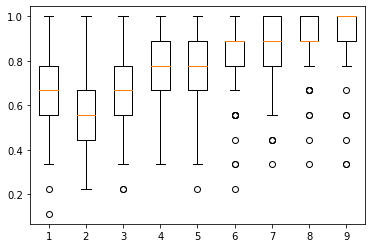

In [122]:
plt.boxplot(paccs.swapaxes("index", "columns"));

In [123]:
data

,Problem_num,accuracy,tr_code_concat,gen_code_concat,true_code_size,gen_code_size,num_stims_seen,stims_seen,passed_tests,failed_tests,tr_code_full,gen_code_full,tr_domain,gen_domain,gen_reshaped,tr_complexity,gen_complexity
0,1,0.555556,True,(color == 'red' or shape == 'circle'),4,37,1,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'square') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",1,3
1,1,0.555556,True,(color == 'red' or shape == 'square'),4,37,2,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'circle') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",1,3
2,1,1.000000,True,True,4,4,3,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1
3,1,1.000000,True,True,4,4,4,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1
4,1,1.000000,True,True,4,4,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,133,0.777778,(shape == 'triangle' and color == 'green'),(color == 'blue' and shape == 'square'),42,39,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('blue', 'square') == False...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn (color...",1,1,"""lambda x: (x['color'] == 'blue' and x['shape'...",3,3
1193,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,6,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1
1194,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,7,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1
1195,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,8,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1


In [15]:
reshaped = []
for i in data['gen_code_concat']:
  i = i.replace("color", "x['color']")
  i = i.replace("shape", "x['shape']")
  i = f"\"lambda x: {i}\""
  reshaped.append(i)
data['gen_reshaped'] = reshaped
data.to_csv('full_output.csv')

Next Steps:

- Logical Primitives of Thought Paper
- More Comprehensive Complexity Analysis
- Conjunctions vs Disjunctions Bias


In [16]:
data['tr_domain'], data['gen_domain']

(0       9
 1       9
 2       9
 3       9
 4       9
        ..
 1192    1
 1193    1
 1194    1
 1195    1
 1196    1
 Name: tr_domain, Length: 1197, dtype: int64, 0       5
 1       5
 2       9
 3       9
 4       9
        ..
 1192    1
 1193    0
 1194    0
 1195    0
 1196    3
 Name: gen_domain, Length: 1197, dtype: int64)

In [17]:
subbed = data['gen_domain'] - data['tr_domain']

In [18]:
len(subbed[subbed < 0]), len(subbed[subbed > 0]), len(subbed[subbed == 0])

(583, 308, 306)

In [7]:
g_ors = 0
g_ands = 0
g_shapes = 0
g_colors = 0
for i in data['gen_code_concat']:
  g_ors += i.count("or")
  g_ors -= i.count("color")
  g_ands += i.count("and")
  g_shapes += i.count("shape")
  g_colors += i.count("color")

g_ors, g_ands, g_shapes, g_colors

(948, 566, 1136, 1416)

In [8]:
g_ors/(g_ors + g_ands)

0.6261558784676354

In [9]:
t_ors = 0
t_ands = 0
t_shapes = 0
t_colors = 0
for i in data['tr_code_concat']:
  t_ors += i.count("or")
  t_ors -= i.count("color")
  t_ands += i.count("and")
  t_shapes += i.count("shape")
  t_colors += i.count("color")

t_ors, t_ands, t_shapes, t_colors

(1035, 747, 1476, 1485)

In [10]:
t_ors/(t_ors + t_ands)

0.5808080808080808

In [13]:
nornand = []
for i in data['tr_code_concat']:
  nor = i.count('or') - i.count('color')
  nand = i.count('and')
  if (nor-nand < 0):
    nornand.append('conjunction')
  elif (nor-nand > 0):
    nornand.append('disjunction')
  else:
    nornand.append('both')
data['Type'] = nornand

(0.0, 1.1)

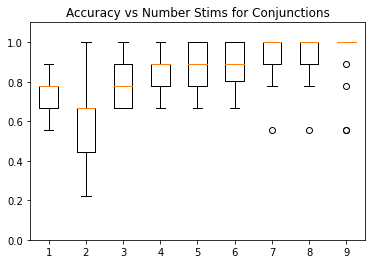

In [101]:
data_conjunc = data[data['Type'] == 'conjunction']
paccs = pd.DataFrame()
for i in range(1, 10):
  paccs[f"{i}"] = data_conjunc[data_conjunc['num_stims_seen'] == i].reset_index()['accuracy']
plt.boxplot(paccs.swapaxes("index", "columns"))
plt.title('Accuracy vs Number Stims for Conjunctions')
plt.ylim((0, 1.1))

(0.0, 1.1)

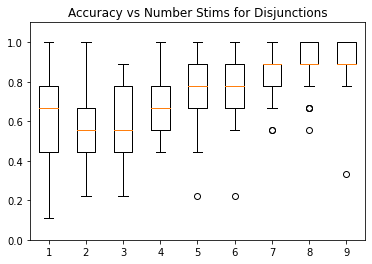

In [100]:
data_disjunc = data[data['Type'] == 'disjunction']
paccs = pd.DataFrame()
for i in range(1, 10):
  paccs[f"{i}"] = data_disjunc[data_disjunc['num_stims_seen'] == i].reset_index()['accuracy']
plt.boxplot(paccs.swapaxes("index", "columns"));
plt.title('Accuracy vs Number Stims for Disjunctions')
plt.ylim((0, 1.1))

In [116]:
tr_complexity = []
for i in data['tr_code_concat']:
  it = i.replace('color', 'colar')
  ct = it.count('colar == ') + it.count('shape ==') + it.count('and') + it.count('or') + it.count('not') + it.count('True') + it.count('False')
  tr_complexity.append(ct)
data['tr_complexity'] = tr_complexity

gen_complexity = []
for i in data['gen_code_concat']:
  it = i.replace('color', 'colar')
  ct = it.count('colar == ') + it.count('shape ==') + it.count('and') + it.count('or') + it.count('not') + it.count('True') + it.count('False')
  gen_complexity.append(ct)
data['gen_complexity'] = gen_complexity

data

,Problem_num,accuracy,tr_code_concat,gen_code_concat,true_code_size,gen_code_size,num_stims_seen,stims_seen,passed_tests,failed_tests,tr_code_full,gen_code_full,tr_domain,gen_domain,gen_reshaped,tr_complexity,gen_complexity
0,1,0.555556,True,(color == 'red' or shape == 'circle'),4,37,1,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'square') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",1,3
1,1,0.555556,True,(color == 'red' or shape == 'square'),4,37,2,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'circle') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",1,3
2,1,1.000000,True,True,4,4,3,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1
3,1,1.000000,True,True,4,4,4,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1
4,1,1.000000,True,True,4,4,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,133,0.777778,(shape == 'triangle' and color == 'green'),(color == 'blue' and shape == 'square'),42,39,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('blue', 'square') == False...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn (color...",1,1,"""lambda x: (x['color'] == 'blue' and x['shape'...",3,3
1193,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,6,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1
1194,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,7,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1
1195,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,8,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1


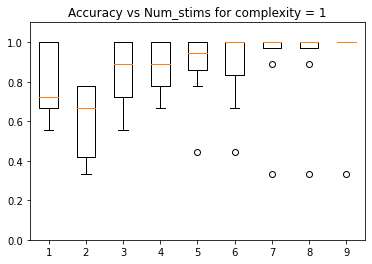

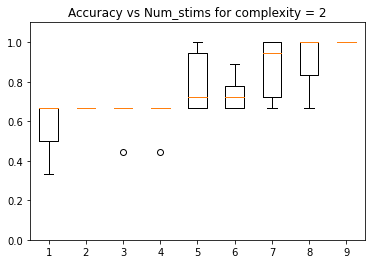

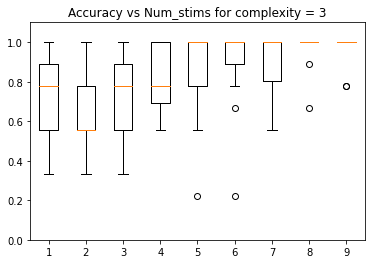

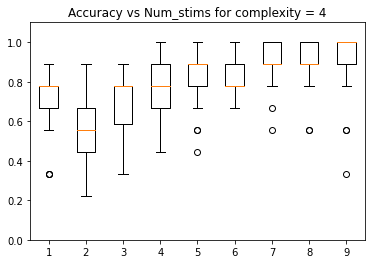

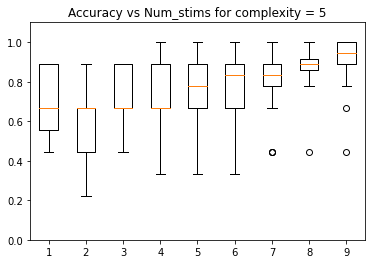

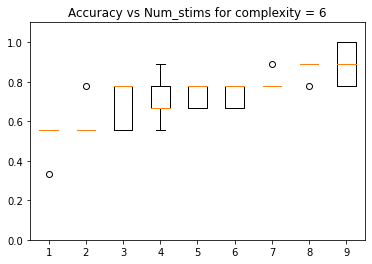

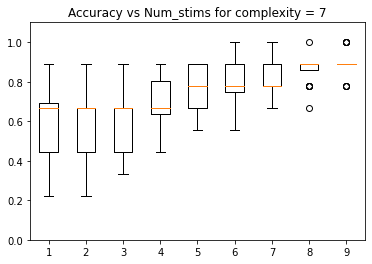

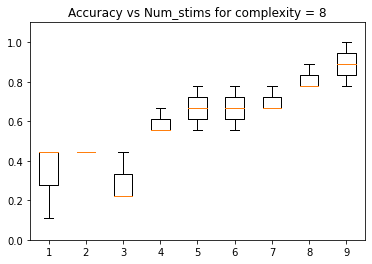

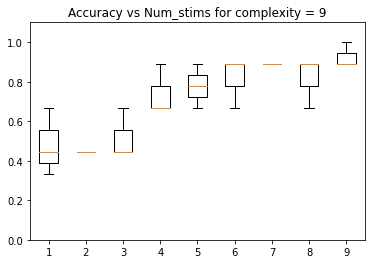

In [99]:
for j in range(1, max(data['tr_complexity']) + 1):
  exec(f"fig{j} = plt.figure('Figure {j}')")
  data_com = data[data['tr_complexity'] == j]
  paccs = pd.DataFrame()
  for i in range(1, 10):
    paccs[f"{i}"] = data_com[data_com['num_stims_seen'] == i].reset_index()['accuracy']
  plt.boxplot(paccs.swapaxes("index", "columns"))
  plt.title(f"Accuracy vs Num_stims for complexity = {j}")
  plt.ylim((0, 1.1))

In [103]:
dimension = []
for i in data['tr_code_concat']:
  ns = i.count('shape')
  nc = i.count('color')
  if (ns - nc > 0):
    dimension.append('shape')
  elif (nc - ns > 0):
    dimension.append('color')
  else:
    dimension.append('same')
data['dimension'] = dimension

In [104]:
data

,Unnamed: 0,Problem_num,accuracy,tr_code_concat,gen_code_concat,true_code_size,gen_code_size,num_stims_seen,stims_seen,passed_tests,...,tr_code_full,gen_code_full,tr_domain,gen_domain,gen_reshaped,Type,complexity,tr_complexity,gen_complexity,dimension
0,0,1,0.555556,True,(color == 'red' or shape == 'circle'),4,37,1,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",...,"""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",both,1,1,3,same
1,1,1,0.555556,True,(color == 'red' or shape == 'square'),4,37,2,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",...,"""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",both,1,1,3,same
2,2,1,1.000000,True,True,4,4,3,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",...,"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",both,1,1,1,same
3,3,1,1.000000,True,True,4,4,4,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",...,"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",both,1,1,1,same
4,4,1,1.000000,True,True,4,4,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",...,"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",both,1,1,1,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1192,133,0.777778,(shape == 'triangle' and color == 'green'),(color == 'blue' and shape == 'square'),42,39,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...",...,"""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn (color...",1,1,"""lambda x: (x['color'] == 'blue' and x['shape'...",conjunction,3,3,3,same
1193,1193,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,6,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...",...,"""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",conjunction,3,3,1,same
1194,1194,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,7,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...",...,"""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",conjunction,3,3,1,same
1195,1195,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,8,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...",...,"""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",conjunction,3,3,1,same


In [129]:
px.line(data, x='num_stims_seen', y=['tr_domain', 'gen_domain'], animation_frame='Problem_num', range_y=[-0.5,9.5])

In [132]:
data['tr-gen domain'] = data['tr_domain'] - data['gen_domain']

In [137]:
data

,Problem_num,accuracy,tr_code_concat,gen_code_concat,true_code_size,gen_code_size,num_stims_seen,stims_seen,passed_tests,failed_tests,tr_code_full,gen_code_full,tr_domain,gen_domain,gen_reshaped,tr_complexity,gen_complexity,tr-gen domain
0,1,0.555556,True,(color == 'red' or shape == 'circle'),4,37,1,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'square') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",1,3,4
1,1,0.555556,True,(color == 'red' or shape == 'square'),4,37,2,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'circle') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ...",1,3,4
2,1,1.000000,True,True,4,4,3,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1,0
3,1,1.000000,True,True,4,4,4,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1,0
4,1,1.000000,True,True,4,4,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True""",1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,133,0.777778,(shape == 'triangle' and color == 'green'),(color == 'blue' and shape == 'square'),42,39,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('blue', 'square') == False...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn (color...",1,1,"""lambda x: (x['color'] == 'blue' and x['shape'...",3,3,0
1193,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,6,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1,1
1194,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,7,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1,1
1195,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,8,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False""",3,1,1


     1  2  3  4  5  6  7  8  9
0    4  4  0  0  0  0  0  0  0
1   -1  3 -1  2  2 -1 -1 -1  2
2   -1  3 -1 -1 -1 -1  2  1  1
3   -3  1 -3 -3  0 -3  0  0  0
4   -1  3 -1  3 -1  0 -1 -1  0
..  .. .. .. .. .. .. .. .. ..
128  2  1  1  2  1  2 -1  1  0
129  1 -4  1  0  0  1 -2  0  0
130  2 -3  2  2  1  2  2  1  0
131  1 -4  1  1  0  1  0  0  0
132  1  0  1  0  0  1  1  1 -2

[133 rows x 9 columns]


(-5.0, 5.0)

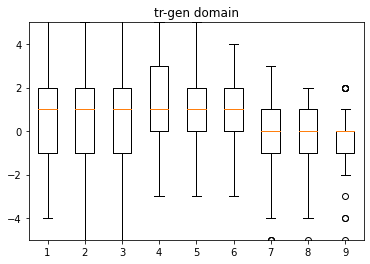

In [142]:
paccs = pd.DataFrame()
for i in range(1, 10):
  paccs[f"{i}"] = data[data['num_stims_seen'] == i].reset_index()['tr-gen domain']
print(paccs)
plt.boxplot(paccs.swapaxes("index", "columns"));
plt.title('tr-gen domain')
plt.ylim((-5, 5))

In [134]:
px.line(data, x='num_stims_seen', y='tr-gen domain', animation_frame='Problem_num', range_y=[-5, 5])